# 8. Programmierübung: Statistische Test Methoden

<div style="display:flex;">
    <div style="text-align: left">
        Willkommen zur achten Programmierübung Einführung in Python 3.
    </div>
    <img style="float: right; margin: 0px 15px 15px 0px" src="https://www.python.org/static/img/python-logo-large.c36dccadd999.png?1576869008" width="100" />
</div>

Wenn Sie Fragen oder Verbesserungsvorschläge zum Inhalt oder Struktur der Notebooks haben, dann können sie eine E-Mail an Phil Keier ([p.keier@hbk-bs.de](mailto:p.keier@hbk-bs.de?subject=[SigSys]%20Feedback%20Programmierübung&amp)) schreiben.

Link zu einem Python Spickzettel: [hier](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PythonForDataScience.pdf)

Der Großteil des Python-Tutorials stammt aus der Veranstaltung _Deep Learning Lab_ und von [www.python-kurs.eu](https://www.python-kurs.eu/python3_kurs.php) und wurde für _Signale und Systeme_, sowie _Einführung in die Programmierung für Nicht Informatiker_ angepasst.

---

In [1]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 1.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 22.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 25.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.2/355.2 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 21.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 23.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 21.2 MB

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sb

ModuleNotFoundError: No module named 'numpy'

# Was ist ein T-Test?

Der T-Test ist eine Methode um zu bestimmen ob es einen Signifikanten Unterschied zweier distinkter Populationen gibt.
Hierzu können wir diverse bereits bekannte Python Libraries und deren Funktionen nutzen um Hypothesen zu testen.

Wir beschränken uns im folgenden auf den *One-Sample t-Test*.

Dabei hat der/die Analyst/-in gewissen Erwartung an den T-Test:
1. Unabhängigkeit der Beobachtung (Independence of Observation)
2. Normalität (Normality)
3. Gleiche Varianz (Equal variances)

Ein wenig Notation:
1. Eine Hypothese ist eine Annahme die über eine Population getroffen wird.
2. Eine Nullhypothese $H_0$ ist die Grundannahme einer statistischen Untersuchung, welche Beweist oder widerlegt werden soll.
3. Eine Population ist eine (Daten-)Gruppe, welche über bestimmte Charakteristika verfügt.
4. Samples sind unter(daten-)gruppen einer bestimmten Population.
5. Nullverteilung (Null Distribution) ist die Verteilung unter der Annahme das $H_0$ Wahr ist.

## Die Idee

Aus voherigen Übungen ist die Normalverteilung bekannt, diese gibt an wie wahrscheinlich es ist das eine Zufallsvariable aus dieser zu beziehen. Folglich wird der Durschnitt der Samples berechnet und verglichen wie Wahrscheinlich es ist das diese auf die Null Distribution fällt. Unter dieser Annahme ist es nun möglich $H_0$ beweisen. 

Dabei sind die benötigten Parameter für jeden Null Hypothesen Test gleich:
1. Bestimmen der Parameter einer Populationn
2. Aufstellen der Null Hypothese $H_0$
3. Sammeln (& bereinigen) der Samples
4. Aufstellen der Null Distribution


---

## Beispiel

### Parameter bestimmung einer Population

Das durchschnittliche Studiendauer für den Bachelor in Deutschland ist auf 6 Semester festgelegt. 
Im folgenden beschränken wir uns auf diese Annahme. Alle Studiengänge die dieses Kriterium nicht erfüllen werden ausgeschlossen.

### Aufstellen der Null Hypothese

Der durchschnittliche Student (im Erststudium) benötigt für sein Bachelorstudium 6 Semester.

Aus folgender [Statista](https://de.statista.com/statistik/daten/studie/189155/umfrage/durchschnittliche-studiendauer-in-deutschland/) Grafik wissen wir das dies nicht stimmt. Dort ist die Durchschnittsdauer für ein Studium mit einem Median von 9 Semestern (2024) angegeben.

![](./Semester_Deutschland.png)

Wir können also aufstellen: $H_0: \mu=6$

### Sampling

Für das Sampling wird aus der (eigentlich unbekannten) Normalverteilung mit $\mu = 9, \sigma = 1.5$ gesampelt.
Dabei gehen wir von bekannten Zahlen aus. Stand 2016 hatte die TU Braunschweig 20.000 Studierende nehmen wir als Samplegröße 2% dieser. Somit verändert sich jedoch die Aussage von $H_0$ indem diese nicht ganz Deutschland sondern nur die TU Braunschweig abbildet. 

Dies lässt sich wie bereits bekannt mit NumPy folglich erreichen:

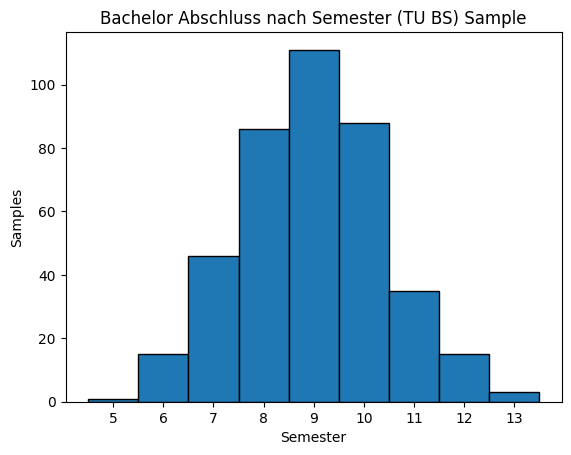

In [16]:
# Parameters
mu: float = 9
sigma: float = 1.5
sample_size: int = int(20_000 * 0.02)

# Sampling
rng = np.random.default_rng(42) # reproduzierbarkeit ist Gewährleistet
samples = rng.normal(mu, sigma, sample_size)

# Plot
min_semester = int(np.floor(samples.min()))
max_semester = int(np.floor(samples.max()))
bins = np.arange(min_semester - 0.5, max_semester + 1.5, 1)

plt.hist(samples, bins=bins, edgecolor="black")
plt.title("Bachelor Abschluss nach Semester (TU BS) Sample")
plt.xlabel("Semester")
plt.ylabel("Samples")
plt.xticks(range(min_semester, max_semester+1))
plt.show()

### Aufstellen der Null Distribution

Nach dem **Central Limit Theorem** gilt:

$$\bar X \sim AN(\mu, \frac{\sigma^2}{n})$$

Das **Central Limit Theorem** geht davon aus das wenn genügend Samples vorhanden sind, die Verteilung dieser, die Normalverteilung anstrebt. Wir gehen daher davon aus das unsere Samples Normaleverteilt sind.

Das mag vielleicht sehr Obvious klingen, da die erhobenen Samples aus einer Normalverteilung stammen, ist aber eine der wichtigen Annahmen die getroffen werden muss, da wir die Verteilung eigentlich nicht kennen.

Statistiker bevorzugen die normalisierte Variante des **Central Limit Theorems** um immer ein Ergebniss im Interval $[0, 1]$ zu erhalten:

$$\frac{(\bar X - \mu)}{\frac{\sigma}{\sqrt n}} \sim AN(0, 1)$$

Dies wäre der Standard Z-Test. Das Problem hierbei ist das $\sigma$ in den meisten Fällen nicht bekannt ist.
Daher ersetzen wir $\sigma^2$, die Standardvarianz, mit der Samplevarianz $S^2$:

$$S^2 = \frac{\sum^n_{i=1} (X_i - \bar X)^2}{n - 1}$$

Daraus lässt sich die normalisierte Variante des **Central Limit Theorems** transformieren. Dies hat den Vorteil das eine feste unbekannte durch eine zufällig erhobene bekannte Variable ersetzt wird. Diese Verteilung heißt **Student's T Distribution** oder kurz **T Distribution** und wird mit einem kleinen **t** abgekürzt:

$$\frac{(\bar X - \mu)}{\frac{\sigma}{\sqrt n}} \rightarrow \frac{(\bar X - \mu)}{\frac{S}{\sqrt n}}$$

Damit haben wir alles zusammen um den *One-Sample t-test* durchzuführen.

1. Population Parameter: $\mu$
2. Null Hypothesis: $H_0: \mu = 6$
3. Test Statistic: $t = \frac{(\bar X - \mu)}{\frac{S}{\sqrt n}}$
4. Null Distribution: $t \sim t_{n-1}$

## Durchführung

Für die Durchführung müssen folglich erst alle Parameter aufgestellt werden:

In [17]:
mu = 6 # Hypothesized Population mean
alpha = 0.05 # significance level

Die samples sind bereits bekannt daher brauchen diese nicht neu berechnet werden.

Der Wert $\alpha$ gibt an, wie signifikant eine Aussage ist, und ist einer der beiden Rückgabeparameter der SciPy-Funktion `stats.ttest_1samp`. Er gibt den maximalen Fehler an, wird aus der aufkumulierten t-Verteilung berechnet und ist der interessantere der beiden Werte.

Mittels SciPy lässt sich folglich der *One-Sample t-test* durchführen:

In [20]:
t_stat, p_value = stats.ttest_1samp(samples, mu)
print("T statistic:", t_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis; there is a significant difference between the sample mean and the hypothesized population mean.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between the sample mean and the hypothesized population mean.")

T statistic: 41.89267214862724
P-value: 3.6070939577287835e-148
Reject the null hypothesis; there is a significant difference between the sample mean and the hypothesized population mean.


## Schlussfolgerung

Aus den gesammelten (herbei gezauberten) Daten lässt sich Schlussfolgern das die Null Hypothese $H_0$, dass Studenten im Erststudium an der TU Braunschweig ihr Erststudium in der Regel nicht nach 6 Semestern abschließen.

---

### Aufgabe T-Test

*6 Punkte - Programmieren*

*6 Punkte - Schriftteil*

Für diese Aufgabe ist extra ein Feld für den Schriftteil reserviert. **Erkläre** dort dein Vorgehen, die Nullhypothese, dein Ergebnis und wie der Nominallohn zu verstehen ist. **Interpretiere** dein Ergebnis und Stelle ein **Fazit** auf. Gebe auch alle verwendeten Quellen (samt link) korrekt an.
Jupyter unterstütz die Markdown Syntax ein Guide hierfür ist unter [The Ultimate Markdown Guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) zu finden.

**!!Wird der Schriftteil nicht oder nur unzureichend ausgefüllt führt dies zu einer Bewertung von 0 Punkten für die gesamte Aufgabe!!**

Dem Notebook mit beigelegt ist das Datenset `nominallohn_deutschland_2023-2024_nach_geschlecht.csv` (Quelle: [DESTASIS Nominallohnindex: Deutschland, Monate, Geschlecht](https://www-genesis.destatis.de/datenbank/online/statistic/62361/table/62361-0003)).

Analysiere das Datenset, gehen dabei von der Nullhypothese aus das es keinen Signifikanten Unterschied in den Nominallöhnen zwischen den Geschlechtern gibt.

Gehe dabei wie folgt vor:
1. Stelle die Nullhypothese prüfbar auf.
2. Importiere das Datenset und filtere angemessen (Kommentare helfen mir später bei der Korrektur diesen Schritt nachzuvollziehen)
3. Berechne den von der Nullhypothese geforderten Populations Parameter $\mu$.
4. Bestimme das Signifikanzlevel $\alpha$ unter der $H_0$ verworfen wird.
5. Bestimme mittels t-test den p-wert zur Nullhypothese.
6. Stelle dein Ergebnis dar.


        Fail to reject the null hypothesis;
        there is no significant difference between the sample mean
        and the hypothesized population mean.
        
P-Value: 0.95


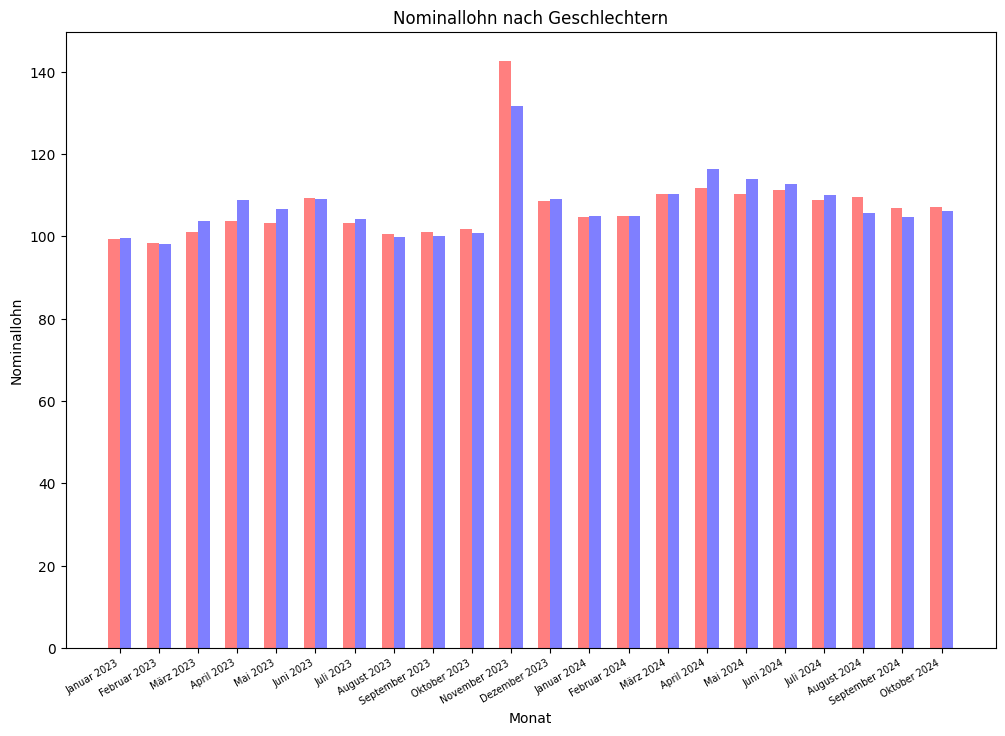

In [24]:
# BEGIN SOLUTION
# Load dataset from CSV file
dataset: pd.DataFrame = pd.read_csv('nominallohn_deutschland_2023-2024_nach_geschlecht.csv', delimiter=',')

# Split dataset by gender
male = dataset.loc[dataset["Geschlecht"] == "männlich"]
female = dataset.loc[dataset["Geschlecht"] == "weiblich"]

# Compute population mean (male wages) and define significance level
mu = male["Nominallohn"].mean()
alpha = 0.05

# One-sample t-test: female wages against male population mean
t_stat, p_value = stats.ttest_1samp(female["Nominallohn"], mu)

# Hypothesis test decision based on p-value
if p_value < alpha:
    print('''
        Reject the null hypothesis;
        there is a significant difference between the sample mean
        and the hypothesized population mean.
        '''
         )
else:
    print('''
        Fail to reject the null hypothesis;
        there is no significant difference between the sample mean
        and the hypothesized population mean.
        '''
         )

print(f"P-Value: {p_value:.2}")


# Define month labels
months = ["Januar", "Februar", "März", "April", "Mai", "Juni", "Juli", "August", "September", "Oktober", "November", "Dezember"]

# Extract monthly nominal wages for each gender and year
dw_2023 = {f"{m} 2023": female.loc[female["Monat"] == m].loc[female["Jahr"] == 2023]["Nominallohn"].values[0] for m in months}
dw_2024 = {f"{m} 2024": female.loc[female["Monat"] == m].loc[female["Jahr"] == 2024]["Nominallohn"].values[0] for m in months[:-2]}
dm_2023 = {f"{m} 2023": male.loc[male["Monat"] == m].loc[male["Jahr"] == 2023]["Nominallohn"].values[0] for m in months}
dm_2024 = {f"{m} 2024": male.loc[male["Monat"] == m].loc[male["Jahr"] == 2024]["Nominallohn"].values[0] for m in months[:-2]}

# Plot

# Prepare bar plot layout
fig, ax = plt.subplots(figsize = (12, 8))
width = 0.3
ind_23 = np.arange(len(dw_2023))
ind_24 = np.arange(len(dw_2023), len(dw_2023) + len(dw_2024))

# Build x-axis labels
labels = list(dw_2023.keys()) + list(dw_2024.keys())

# Plot nominal wages by gender and year
plt.bar(ind_23, dw_2023.values(), width, alpha=0.5, color='red')
plt.bar(ind_24, dw_2024.values(), width, alpha=0.5, color='red')
plt.bar(ind_23+width, dm_2023.values(), width, alpha=0.5, color='b')
plt.bar(ind_24+width, dm_2024.values(), width, alpha=0.5, color='b')

# Configure axes and display plot
plt.xlabel('Monat')
plt.ylabel('Nominallohn')
plt.title('Nominallohn nach Geschlechtern')
plt.xticks(np.arange(len(dw_2023) + len(dw_2024)) + width / 2, labels)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
plt.show()
# END SOLUTION

# BEGIN SOLUTION

### Nominallohn 
>das tatsächlich in € gezahlte Entgelt für geleistete Arbeit (Gegensatz: Reallohn). Der Nominallohn lässt keine Aussagen über die Kaufkraft zu, da die Preisentwicklung nicht berücksichtigt wird. Werden in einem Tarifvertrag z. B. Lohnsteigerungen von 3 % vereinbart, und die Inflationsrate beträgt gleichzeitig 2 %, so steigen die Löhne nominal um 3 %, tatsächlich (real) aber nur um 1 %.

Quelle: [bpb.de](https://www.bpb.de/kurz-knapp/lexika/lexikon-der-wirtschaft/20175/nominallohn/)

### Nullhypothese
> Der männliche Nominallohn unterscheidet sich nicht von dem des weiblichen Nominallohns.

### Vorgehen
Filtern des Datensets in die beiden Kategorien *männlich* & *weiblich*.
Danach aufstellen der oben genannten Nullhypothese.
Folglich ist der Populations Parameter zur Nullhypothese $\mu$ der Durschnittswert der männlichen Nominallöhne.
Also Signifikanz Parameter $\alpha$ wird 0.05 verwendet.
Nach t-test gegen die weiblichen Nominallöhne ergibt sich, das die Null Hypothese nicht verworfen werden kann.

### Fazit
Die Null Hypothese lässt sich als Bestätigt ansehen. Daher gibt es keinen Unterschied zwischen den Nominallöhnen beider Geschlechter.

# END SOLUTION

---

# Korrelation

## Was ist eine Korrelation?

Als Korrelation beschreibt man den Zusammenhang zweier Variabeln und ihre Abhängigkeit zueinander. Dabei wird ein Korrelationkoeffizient berechnet. Dieser hat immer einen Wert zwischen -1 & +1. Dabei gilt, dass bei einem Wert von ±1 eine perfekte Assoziation vorliegt. Je weiter der Wert des Korrelationskoeffizienten gegen 0 geht, desto schwächer ist die Beziehung zwischen den beiden Variablen. Die Richtung der Beziehung ist durch das Vorzeichen gegeben; ein positives Vorzeichen (+) zeigt eine positive Beziehung der beiden Variabeln auf, während bei einem negativen Vorzeichen (-) eine negative Beziehung vorliegt.

## Pearson Corellation Coefficient

Nach dem Mathematiker *Karl Pearson* benannt lässt sich mittels pandas auf jedem Dataframe die Funktion *.corr* aufrufen. Diese berechnet den Korrelations koefficienten zwischen allen **numerischen** Variablen in dem DataFrame.

Hierzu ein Beispiel mit dem Datenset `nominallohn_deutschland_2023-2024_nach_geschlecht.csv`.
Wichtig ist *.corr* die Parameter *method* & *numeric_only* mitzugeben, da es keinen Sinn ergibt einen Koeffizienten zwischen zwei Strings zu berechnen:

In [25]:
dataset: pd.DataFrame = pd.read_csv('nominallohn_deutschland_2023-2024_nach_geschlecht.csv', delimiter=',')
pearsoncorr = dataset.corr(method='pearson', numeric_only=True)
pearsoncorr

Jahr  Nominallohn
Jahr         1.000000     0.172602
Nominallohn  0.172602     1.000000

Mittels Seaborn lässt sich diese Tabelle auch Farbig darstellen:

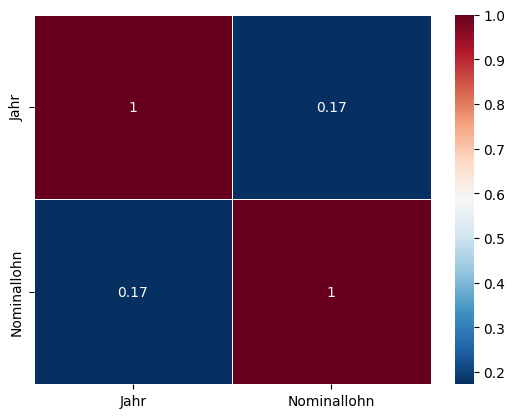

In [26]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

Das Datenset enthält nur wenige Numerische Werte, dennoch lässt sich feststellen das die Beziehung zwischen dem erhobenen Jahr (2023/2024) und dem Nominallohn mit 0.17 ist. Damit zeigt sich das diese beiden Variablen keine Abhängigkeit voneinander haben.

## Kendall Tau

Eine andere möglichkeit Korrelationen festzustellen ist die Methode nach *David George Kendall*.

Anzuwenden ist sie unter den folgenden Bedingungen:
1. Die Daten folgend annährend einer Normalverteilung
2. Die Datenlage ist klein

Das Kendall Tau wird folglich berechnet mit:

$$\tau = \frac{C-D}{C+D}$$

Dabei ist $C$ die Anzahl Übereinstimmender Paare und $D$ die Anzahl der nicht übereinstimmenden Paare.

Dazu ein Beispiel:

Wir nehmen an das wir zwei Doktoren hätten, welche 6 Patienten nach ihrem Gesundheitszustand einschätzen. Hierfür ergibt sich folgende Datenlage (Doktor 1 ist die Reference der Datenlage):

|Doktor 1|Doktor 2|
|-|-|
|1|3|
|2|1|
|3|4|
|4|2|
|5|6|
|6|5|

Nun wird paarweise verglichen und die Vorzeichen beachtet danach aufsummiert. Dies führt dazu das $C=11$ & $D=4$.
Diese Werte lassen sich wunderbar in die Formel einsetzen um so das Kendallsche Tau zu berechnen:

$$\tau = \frac{C-D}{C+D} = \frac{11-4}{11+4} = \frac{7}{15} = 0.47$$

Wie bei Pearson ist die Relationseinschätzung die selbe. Für einen Wert im Bereich +0.5 ist eine Moderate Abhängigkeit festzustellen.

Selbiges Beispiel in Python. Diesmal wird in die *.corr* Funktion nur die Methode geändert:

In [27]:
kendall = pd.DataFrame({
    "Doktor 1": [1, 2, 3, 4, 5, 6],
    "Doktor 2": [3, 1, 4, 2, 6, 5]
})
kendall_tau = kendall.corr(method='kendall', numeric_only=True)
kendall_tau

Doktor 1  Doktor 2
Doktor 1  1.000000  0.466667
Doktor 2  0.466667  1.000000

Wie zu sehen kommt der selbe Wert raus.

## Spearman

Die Methode benannt nach dem Psychologen *Charles Spearman* misst auch einen Korrelationskoeffizienten zwischen zwei Datengruppen.
Im Unterschied zu Pearson ist wird Spearman dann angewandt wenn die Daten keiner Normalverteilung folgen.

Erstellen wir uns für ein Beispiel ein Datenset bei dem die Reaktionsgeschwindigkeit eines Individuums mit seinem Alter verglichen wird:

In [30]:
rng = np.random.default_rng(42) # reproduzierbarkeit
spearman = pd.DataFrame({
    "Alter": rng.integers(15, 25, 10),
    "Reaktionsgeschwindigkeit": rng.integers(12, 30, 10) 
})
spearman

Alter  Reaktionsgeschwindigkeit
0     15                        21
1     22                        29
2     21                        25
3     19                        25
4     19                        24
5     23                        26
6     15                        21
7     21                        14
8     17                        27
9     15                        20

In [31]:
spearman_corr = spearman.corr(method='spearman', numeric_only=True)
spearman_corr

Alter  Reaktionsgeschwindigkeit
Alter                     1.000000                  0.509356
Reaktionsgeschwindigkeit  0.509356                  1.000000

In diesem Beispiel lässt sich auch wieder selbige Korrelationsmetrik anwenden und es zeigt sich, dass die erzeugten Daten eine moderate Abhängigkeit zueinander haben.

## Merkzettel

1. Pearson sollte dann angewandt werden, wenn die Daten annährend einer Normaleverteilung folgen bzw. aus einer erhebt wurden.
2. Kendall (wie Pearson) nur bei kleinerer Datenlage.
3. Spearman sollte dann angewandt werden, wenn die Daten keiner Normalverteilung folgen.

Korrelationsmetrik:

|Positiver Koeffizient|Negativer Koeffizient|Assoziation|
|-|-|-|
|+1.0 - +0.8|-1.0 - -0.8|Perfekte bis sehr Stark|
|+0.8 - +0.6|-0.8 - -0.6|Stark|
|+0.6 - +0.4|-0.6 - -0.4|Moderat|
|+0.4 - +0.2|-0.4 - -0.2|Schwach|
|+0.2 - +0.0|-0.2 - -0.0|Sehr Schwach bis Garnicht|

### Aufgabe

*8 Punkte - Programmieren*

*8 Punkte - Schriftteil*

Für diese Aufgabe ist extra ein Feld für den Schriftteil reserviert. **Erkläre** dort dein Vorgehen, die Nullhypothese, dein Ergebnis und wie der Bruttoverdienst zu verstehen ist. **Analysiere** den Gender Pay Gap zum Erhebungszeitraum der Daten und **Vergleiche** diesen mit deiner Berechnung. **Interpretiere** dein Ergebnis und Stelle ein **Fazit** auf. Gebe auch alle verwendeten Quellen (samt link) korrekt an. 
Jupyter unterstütz die Markdown Syntax ein Guide hierfür ist unter [The Ultimate Markdown Guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) zu finden.

**!!Wird der Schriftteil nicht oder nur unzureichend ausgefüllt führt dies zu einer Bewertung von 0 Punkten für die gesamte Aufgabe!!**

Analysiere das Datenset `bruttoverdiensterhebung_deutschland_april_22-23_nach_geschlecht.csv` (Quelle: [Destatis]( https://www-genesis.destatis.de/datenbank/online/statistic/62361/table/62361-0030))

Gehe dabei von der Hypothese aus das einen keinen Bruttoeinkommensunterschied der Geschlechter in Deutschland für den Zeitraum 2022-2023 gibt.

Gehe dabei wie folgt vor:
1. Lies das Datenset ein und schaue dir die vorhandenen Werte an. Achte auf `Nan` Werte.
2. Filter aus der Spalte "Geschlecht" die benötigten Werte.
3. Führe einen Korrelationstest zwischen den Geschlechtern & dem Bruttoverdienst durch.
4. Berechne den Bruttoeinkommensunterschied.
5. Stelle den unbereinigten Gender Pay Gap auf.
6. Finde eine geeignete Darstellung für dein Ergebnis.

*PS: Da es sich hier um ein Kontroverses, in der Gesellschaft viel disskutiertes, Thema handelt, bitte ich die Contenance zu bewahren. Es gibt bei einer komplexen Erhebung wie dieser kein richtig oder falsch. Es kommt ganz auf die Methodik an mit der Berechnet wird, begründe daher alles.*

In [32]:
# BEGIN SOLUTION
import pandas as pd
dataset: pd.DataFrame = pd.read_csv('bruttoverdiensterhebung_deutschland_april_22-23_nach_geschlecht.csv')
dataset
# END SOLUTION

Geschlecht                                           Branche  Verdienst  \
0       weiblich                       Metalloberflächenbehandlung      16.19   
1       weiblich                       Metalloberflächenbehandlung    2810.00   
2       weiblich                       Metalloberflächenbehandlung      17.28   
3       weiblich                       Metalloberflächenbehandlung    2705.00   
4       männlich            Nicht ärztliche Therapie und Heilkunde      18.99   
...          ...                                               ...        ...   
17767  Insgesamt        Rohstoffgewinn, Glas-, Keramikverarbeitung    3181.00   
17768  Insgesamt  Nichtmed. Gesundheit, Körperpfl., Medizintechnik      19.63   
17769  Insgesamt  Nichtmed. Gesundheit, Körperpfl., Medizintechnik    3373.00   
17770  Insgesamt  Nichtmed. Gesundheit, Körperpfl., Medizintechnik      20.74   
17771  Insgesamt  Nichtmed. Gesundheit, Körperpfl., Medizintechnik    3201.00   

                                           Verdienstart  
0        Mittlere Bruttostundenverdienste ohne Sonderz.  
1       Durchschn. Bruttomonatsverdienste ohne Sonderz.  
2      Durchschn. Bruttostundenverdienste ohne Sonderz.  
3         Mittlere Bruttomonatsverdienste ohne Sonderz.  
4        Mittlere Bruttostundenverdienste ohne Sonderz.  
...                                                 ...  
17767     Mittlere Bruttomonatsverdienste ohne Sonderz.  
17768    Mittlere Bruttostundenverdienste ohne Sonderz.  
17769   Durchschn. Bruttomonatsverdienste ohne Sonderz.  
17770  Durchschn. Bruttostundenverdienste ohne Sonderz.  
17771     Mittlere Bruttomonatsverdienste ohne Sonderz.  

[17772 rows x 4 columns]

# BEGIN SOLUTION
# END SOLUTION